### Sampling with replacement
- Bootstrapping is great for calculating confidence intervals for means; you'll now practice doing just that!

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
nba_weights = [96.7, 101.1, 97.9, 98.1, 98.1, 100.3, 101.0, 98.0, 97.4]
simu_weights = []


# Sample nine values from nba_weights with replacement 1000 times
for i in range(1000):
    bootstrap_sample = random.choices(nba_weights, k=9)
  
    simu_weights.append(np.mean(bootstrap_sample))

# Calculate the mean and 95% confidence interval of the mean for your results
mean_weight = np.mean(simu_weights)
upper = np.quantile(simu_weights, 0.975)
lower = np.quantile(simu_weights, 0.025)
print(mean_weight, lower, upper)

98.74435555555554 97.74416666666667 99.81111111111112


/Users/alket/miniconda3/envs/myenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


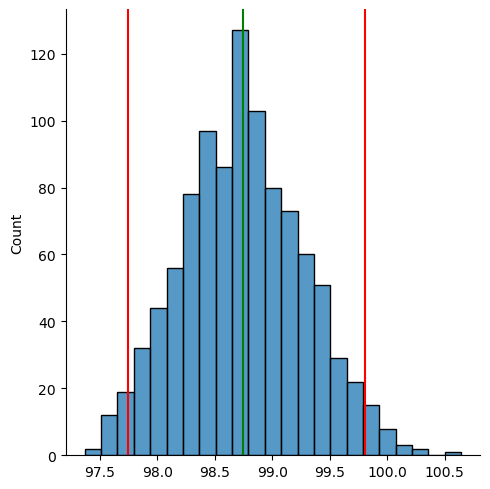

In [2]:
import seaborn as sns
# Plot the distribution of the simulated weights
sns.displot(simu_weights)

# Plot vertical lines for the 95% confidence intervals and mean
plt.axvline(lower, color="red")
plt.axvline(upper, color="red")
plt.axvline(mean_weight, color="green")
plt.show()

## Permutation practice
Are NBA players heavier than US adult males? You are now interested in calculating the 95% confidence interval of the mean difference (in kilograms) between NBA
players and US adult males. Use the two lists provided.

Permutation is great when testing for difference, so that's the resampling method you'll use here!

Note that each of the above lists has 13 weights listed.

In [3]:
nba_weights = [96.7, 101.1, 97.9, 98.1, 98.1, 100.3, 101.0, 98.0, 97.4, 100.5, 100.3, 100.2, 100.6]
us_adult_weights = [75.1, 100.1, 95.2, 81.0, 72.0, 63.5, 80.0, 97.1, 94.3, 80.3, 93.5, 85.8, 95.1]

In [4]:
# Define all_weights
all_weights = us_adult_weights + nba_weights
simu_diff = []

for i in range(1000):
    # Perform the permutation on all_weights
    perm_sample = np.random.permutation(all_weights)
    # Assign the permutated samples to perm_nba and perm_adult
    perm_nba, perm_adult = perm_sample[0:13], perm_sample[13:26]
    perm_diff = np.mean(perm_nba) - np.mean(perm_adult)
    simu_diff.append(perm_diff)
mean_diff = np.mean(nba_weights) - np.mean(us_adult_weights) 
upper = np.quantile(simu_diff, 0.975)
lower = np.quantile(simu_diff, 0.025)
print(mean_diff, lower, upper)

13.630769230769246 -8.184999999999999 7.708076923076914


You can see that the mean difference lies outside the 95% confidence interval, suggesting that given these two lists of samples, the NBA players' mean weight is significantly different from the average US adult males'!

### Paired dice simulation
Similar to the example in the lesson, you will roll two dice from two bags, and each bag contains three biased dice.

- bag1 = [[1, 2, 3, 6, 6, 6], [1, 2, 3, 4, 4, 6], [1, 2, 3, 3, 3, 5]]
- bag2 = [[2, 2, 3, 4, 5, 6], [3, 3, 3, 4, 4, 5], [1, 1, 2, 4, 5, 5]]


The difference is that the dice in the two bags are paired: if you pick the second die in bag1, you will also pick the second die in bag2. In each trial:

You pick one pair of dice from the two bags randomly and roll them
Success occurs if the points on dice1 and dice2 add up to eight; otherwise, failure
Your task is to complete the for-loop in the roll_paired_biased_dice() function and to use this function to calculate the probabilities of success for each unique combination of points on dice1 and dice2.

In [5]:
# thre biased dies in two bags each
bag1 = [[1, 2, 3, 6, 6, 6], [1, 2, 3, 4, 4, 6], [1, 2, 3, 3, 3, 5]]
bag2 = [[2, 2, 3, 4, 5, 6], [3, 3, 3, 4, 4, 5], [1, 1, 2, 4, 5, 5]]

In [6]:
import pandas as pd
def roll_paired_biased_dice(n, seed=1231):
    random.seed(seed)
    results = {}
    for i in range(n):
        bag_index = random.randint(0, 1)
        # Obtain the dice indices
        dice_index1 = random.randint(0, 5)
        dice_index2 = random.randint(0, 5)
        # Sample a pair of dice from bag1 and bag2
        point1 = bag1[bag_index][dice_index1]
        point2 = bag2[bag_index][dice_index2]
        key = "%s_%s" % (point1, point2)
        if point1 + point2 == 8: 
            if key not in results:
                results[key] = 1
            else:
                results[key] += 1
    return(pd.DataFrame.from_dict({'dice1_dice2':results.keys(),
		'probability_of_success':np.array(list(results.values()))*100.0/n}))

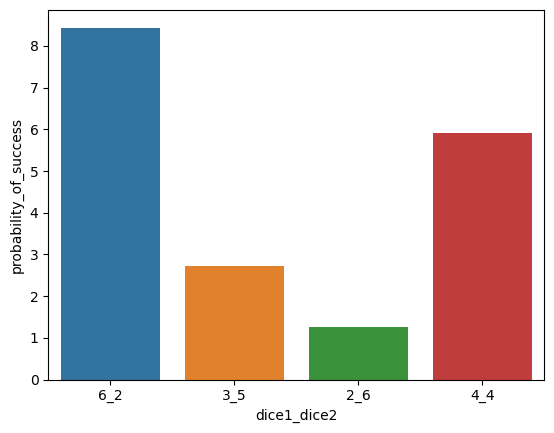

In [7]:
def roll_paired_biased_dice(n, seed=1231):  
    results = {}
    random.seed(seed)
    for i in range(n):
        bag_index = random.randint(0, 1)
        dice_index1 = random.randint(0, 5)
        dice_index2 = random.randint(0, 5)
        point1 = bag1[bag_index][dice_index1]
        point2 = bag2[bag_index][dice_index2]
        key = "%s_%s" % (point1, point2)
        if point1 + point2 == 8: 
            if key not in results:
                results[key] = 1
            else:
                results[key] += 1
    return(pd.DataFrame.from_dict({"dice1_dice2":results.keys(),
		"probability_of_success":np.array(list(results.values()))*100.0/n}))

# Run the simulation 10,000 times and assign the result to df_results
df_results = roll_paired_biased_dice(10000)
sns.barplot(x="dice1_dice2", y="probability_of_success", data=df_results)
plt.show()

### Computing Pi

In [8]:
n = 4000000
circle_points = 0 
square_points = 0 
for i in range(n):
    x = random.uniform(-1, 1)
    y = random.uniform(-1, 1)
    dist_from_origin = x**2 + y**2
    # Increment circle_points for any point with a distance from origin of less than .75
    if dist_from_origin < 1:
        circle_points += 1
    square_points += 1
pi = 4 * circle_points / square_points
print(pi)

3.142038
